In [6]:
import sys
sys.path.append("..")

In [7]:
import os
import numpy as np
import pandas as pd
import spotlob
import tifffile as tf
import matplotlib.pyplot as plt
import imageio as im

In [8]:
from spotlob.process_steps import Reader
from spotlob.parameters import NumericRangeParameter

In [9]:
class TifReader(Reader):
    """
    Reads an image from a file as an RGB file.
    Only image format `tif` is supported.
    It uses `tifffile.memmap`.
    """

    def __init__(self, filepath, xpix, ypix):
        # TODO: xpix and ypix aus Metadaten einlesen
        pars = [NumericRangeParameter("width", xpix, 0, xpix), 
                NumericRangeParameter("height", ypix, 0, ypix),
                NumericRangeParameter("height", (0, 0), (0, 0), (xpix, ypix))]
        super(TifReader, self).__init__(self.partial_read, pars)
       

    def partial_read(self, filepath, width, height, startingpoint= (0, 0)):
        """
        Returns an array of a part of an .tif image.
        Starting Point is the top-left corner.
        """
        if os.path.exists(filepath):
            return tf.memmap(filepath, dtype= np.uint8)[startingpoint[1]: startingpoint[1] + height,\
                                     startingpoint[0]: startingpoint[0] + width, :]
        else:
            raise IOError(f"File {filepath} not found")

    def preview(self, spim):
        pass

In [10]:
# Creates a testtif.tif image
width = 1000
height = 1000
array = np.zeros([height, width, 3], dtype= np.uint8)
array[:height//2,:width//2] = [255, 0, 0]
array[:height//2,width//2:] = [0, 0, 255]   
array[height//2:,:width//2] = [255, 100, 255] 
array[height//2:,width//2:] = [100, 100, 255]
im.imwrite("testtif.tif", array)

In [11]:
h = TifReader("testtif.tif", 1000, 1000)

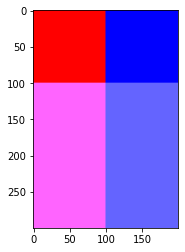

In [12]:
array = h.partial_read("testtif.tif", 200, 300, (400, 400))
plt.imshow(array)

In [13]:
from spotlob.defaults import default_pipeline
filename = "testtif.tif"

In [14]:
gui = spotlob.make_gui(filename)

In [15]:
gui.pipeline = gui.pipeline.replaced_with(TifReader)

In [16]:
spotlob.show_gui(gui)

AttributeError: 'str' object has no attribute 'function'